#**SINGLE LAYER PERCEPTRON**

In [1]:
import numpy as np

In [2]:
class Perceptron:
  def __init__(self, N, learning_rate = 0.1):
    # initialize the weight matrix and store the learning rate
    self.W = np.random.randn(N + 1) / np.sqrt(N)
    self.learning_rate = learning_rate

  def step(self, x):
    # apply the step function
    return 1 if x > 0 else 0 #mengembalikan nilai 1 jika x>0

  def fit(self, X, y, epochs=10):
    # insert a column of 1's as the last entry in the feature
		# matrix -- this little trick allows us to treat the bias
		# as a trainable parameter within the weight matrix
    X = np.c_[X, np.ones((X.shape[0]))]

    # loop over the desired number of epochs
    for epoch in np.arange(0, epochs):
			# loop over each individual data point
      for (x, target) in zip(X, y):
				# take the dot product between the input features
				# and the weight matrix, then pass this value
				# through the step function to obtain the prediction
        p = self.step(np.dot(x, self.W)) #memperbarui bobot
				# only perform a weight update if our prediction
				# does not match the target
        if p != target:
					# determine the error
          error = p - target
					# update the weight matrix
          self.W += -self.learning_rate * error * x

  def predict(self, X, addBias=True):
		# ensure our input is a matrix
    X = np.atleast_2d(X)
		# check to see if the bias column should be added
    if addBias:
			# insert a column of 1's as the last entry in the feature
			# matrix (bias)
      X = np.c_[X, np.ones((X.shape[0]))]
		# take the dot product between the input features and the
		# weight matrix, then pass the value through the step
		# function
    return self.step(np.dot(X, self.W))

**TES PADA MASALAH AND**

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

#define our perceptron and train
print('[INFO] training perception...')
p = Perceptron(X.shape[1], learning_rate = 0.1)
p.fit(X, y, epochs = 10)

#Evaluasi perceptron
print('[INFO] testing perceptron...')
for (x, target) in zip(X, y):
  pred = p.predict(x)
  print('[INFO] data={}, ground-truth={}, pred={}'.format(x, target[0], pred))

[INFO] training perception...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=0, pred=1
[INFO] data=[1 0], ground-truth=0, pred=1
[INFO] data=[1 1], ground-truth=1, pred=1


ground-truth = data seharusnya, pred = prediksi

**TES PADA MASALAH OR**

In [4]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

#define our perceptron an train
print('[INFO] training perception...')
p = Perceptron(X.shape[1], learning_rate = 0.1)
p.fit(X, y, epochs = 20)

#Evaluasi perceptron
print('[INFO] testing perceptron...')
for (x, target) in zip(X, y):
  pred = p.predict(x)
  print('[INFO] data={}, ground-truth={}, pred={}'.format(x, target[0], pred))

[INFO] training perception...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=1
[INFO] data=[1 1], ground-truth=1, pred=1


**TES PADA MASALAH XOR**

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1], [1], [1], [0]])

#define our perceptron an train
print('[INFO] training perception...')
p = Perceptron(X.shape[1], learning_rate = 0.1)
p.fit(X, y, epochs = 20)

#Evaluasi perceptron
print('[INFO] testing perceptron...')
for (x, target) in zip(X, y):
  pred = p.predict(x)
  print('[INFO] data={}, ground-truth={}, pred={}'.format(x, target[0], pred))

[INFO] training perception...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=1, pred=1
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=1
[INFO] data=[1 1], ground-truth=0, pred=0


#**MULTILAYER PERCEPTRON**

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [6]:
#Buat dataset dummy
X, y = make_classification(n_samples=100, random_state=1)

In [7]:
X.shape

(100, 20)

In [8]:
y.shape

(100,)

In [9]:
#Nilai y dan jumlahnya
np.unique(y, return_counts = True)

(array([0, 1]), array([51, 49]))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state =1)

statify = y --> nilai data train dan data test seimbang

In [11]:
#Model MLP Classifier
clf = MLPClassifier(hidden_layer_sizes = (100,100), random_state = 1, max_iter =300)
clf = clf.fit(X_train, y_train)

In [12]:
#Prediksi model
y_pred = clf.predict(X_test)

In [13]:
#Evaluasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
#Skor akurasi
print(accuracy_score(y_test, y_pred))

0.9


<Axes: >

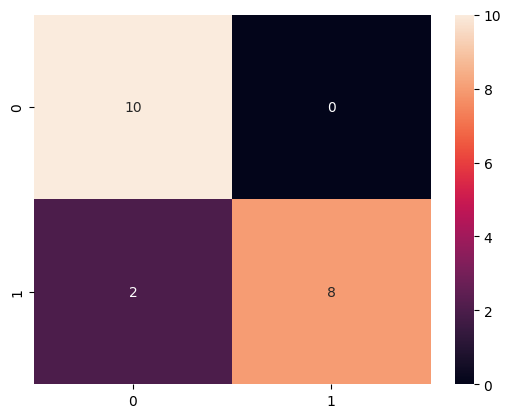

In [15]:
#Confusion matrix
cm = np.array(confusion_matrix(y_test, y_pred, labels = [0,1]))
sns.heatmap(cm, annot=True, fmt = 'g')

In [16]:
#Classifocation Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



Nilai ringkasan evaluasi model klasofikasi yang telah dibuat